In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
import pandas as pd
import random
import numpy as np
import librosa
from glob import glob
import os
import matplotlib.pyplot as plt
import IPython.display as ipd
import random
import librosa.display
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn. model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout ,Activation
from tensorflow.keras.optimizers import Adam
import lightgbm as lgb
import seaborn as sns

In [25]:
import os

# Dataset folder path
base_dir = '/content/drive/My Drive/TESS/TESS Toronto emotional speech set data'

# List contents of the folder
emotions_fld = os.listdir(base_dir)
for i in emotions_fld:
    print(i)


OAF_happy
OAF_angry
YAF_angry
OAF_neutral
TESS Toronto emotional speech set data
OAF_Fear
OAF_Pleasant_surprise
YAF_disgust
OAF_Sad
OAF_disgust
YAF_fear
YAF_neutral
YAF_sad
YAF_happy
YAF_pleasant_surprised


In [32]:
def aud_sample(path):
    for emotion in path:
        emotion_dir = os.path.join(base_dir, emotion)
        audio_files = glob(os.path.join(emotion_dir, '*.wav'))
        random_audio_file = random.choice(audio_files)
        print(emotion)
        ipd.display(ipd.Audio(random_audio_file))

def MFCC_feature_extract(types):
    MFCC_features = []
    Class = []

    for emotion in types:
        emotions_dir = os.path.join(base_dir, emotion)
        audio_files = glob(os.path.join(emotions_dir, '*.wav'))
        for audio_file in audio_files:
            try:
                audio, sample_rate = librosa.load(audio_file)
                mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                mfccs_mean = np.mean(mfccs, axis=1)
                MFCC_features.append(mfccs_mean)
                Class.append(emotion)

            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

    df = pd.DataFrame({'MFCC_Features': MFCC_features, 'Class': Class})
    return df


def Raw_audio_plot(path):
    for emotion in path:
        emotion_dir = os.path.join(base_dir, emotion)
        audio_files = glob(os.path.join(emotion_dir, '*.wav'))
        random_audio_file = random.choice(audio_files)
        audio_data, _ = librosa.load(random_audio_file, sr=None)
        plt.figure(figsize=(10, 5))
        librosa.display.waveshow(audio_data, sr=len(audio_data))
        plt.title(f'Raw Audio Plot for {emotion} ')
        plt.show()

def Spectogram_plot(path):
    for emotion in path:
        emotion_dir = os.path.join(base_dir, emotion)
        audio_files = glob(os.path.join(emotion_dir, '*.wav'))
        random_audio_file = random.choice(audio_files)
        audio_data, _ = librosa.load(random_audio_file, sr=None)

        # Computing the spectrogram
        D = librosa.stft(audio_data)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        # Ploting the spectrogram
        fig, ax = plt.subplots(figsize=(10, 5))
        img = librosa.display.specshow(S_db,
                                      x_axis='time',
                                      y_axis='log',
                                      ax=ax)
        ax.set_title(f'Spectrogram Plot for {emotion}', fontsize=20)
        fig.colorbar(img, ax=ax, format=f'%0.2f')
        plt.show()

In [34]:
import os
import random
from glob import glob
from IPython import display as ipd

def aud_sample(path):
    base_dir = '/content/drive/My Drive/TESS/TESS Toronto emotional speech set data'

    for emotion in path:
        emotion_dir = os.path.join(base_dir, emotion)
        audio_files = glob(os.path.join(emotion_dir, '*.wav'))

        if audio_files:  # Check if audio_files is not empty
            random_audio_file = random.choice(audio_files)
            print(emotion)
            ipd.display(ipd.Audio(random_audio_file))
        else:
            print(f"No .wav files found in {emotion_dir}")


# This dataset contains voice sample of different emotion by two women


In [35]:
aud_sample(emotions_fld)

OAF_happy


OAF_angry


YAF_angry


OAF_neutral


No .wav files found in /content/drive/My Drive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data
OAF_Fear


OAF_Pleasant_surprise


YAF_disgust


OAF_Sad


OAF_disgust


YAF_fear


YAF_neutral


YAF_sad


YAF_happy


YAF_pleasant_surprised


In [36]:
import os
import random
from glob import glob
import matplotlib.pyplot as plt
import librosa

def Raw_audio_plot(path):
    base_dir = '/content/drive/My Drive/TESS/TESS Toronto emotional speech set data'

    for emotion in path:
        emotion_dir = os.path.join(base_dir, emotion)
        audio_files = glob(os.path.join(emotion_dir, '*.wav'))

        if audio_files:  # Check if audio_files is not empty
            random_audio_file = random.choice(audio_files)
            audio_data, _ = librosa.load(random_audio_file, sr=None)
            plt.figure(figsize=(10, 5))
            plt.title(emotion)
            plt.plot(audio_data)
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.show()
        else:
            print(f"No .wav files found in {emotion_dir}")


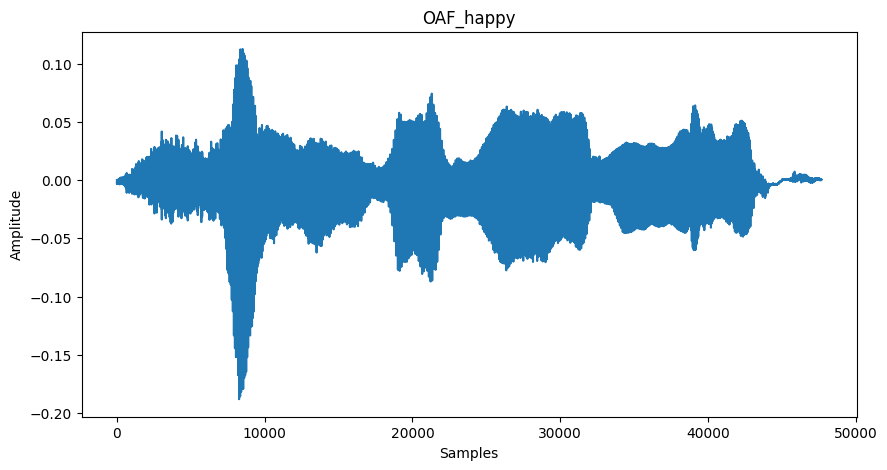

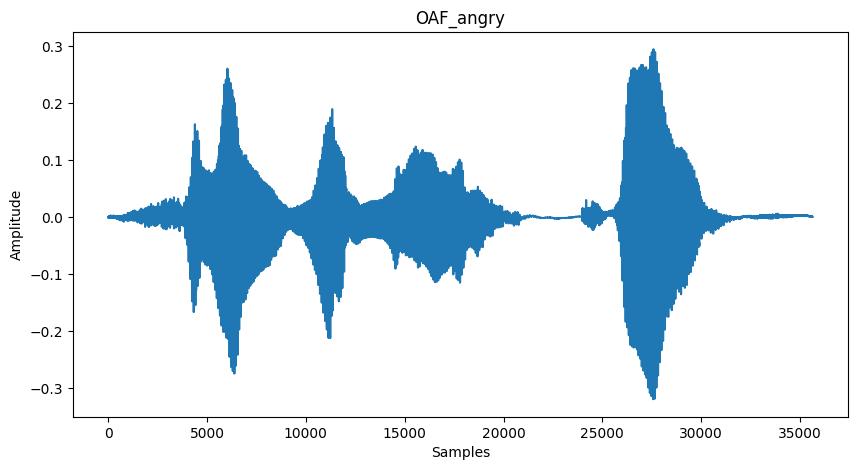

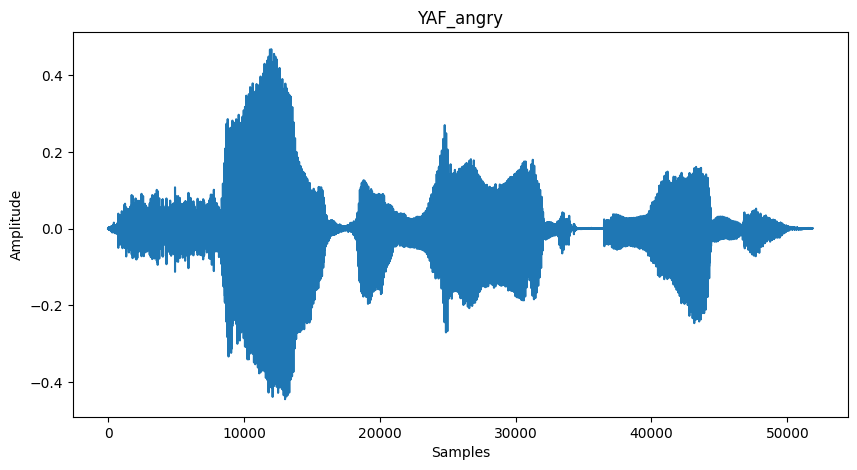

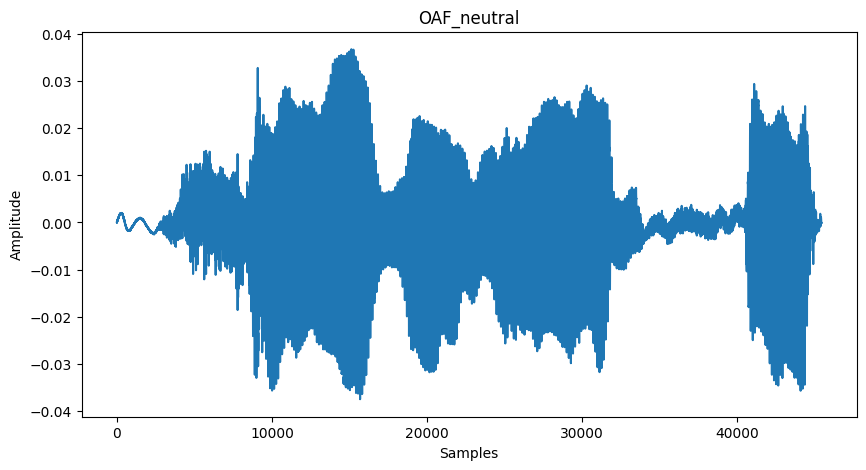

No .wav files found in /content/drive/My Drive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data


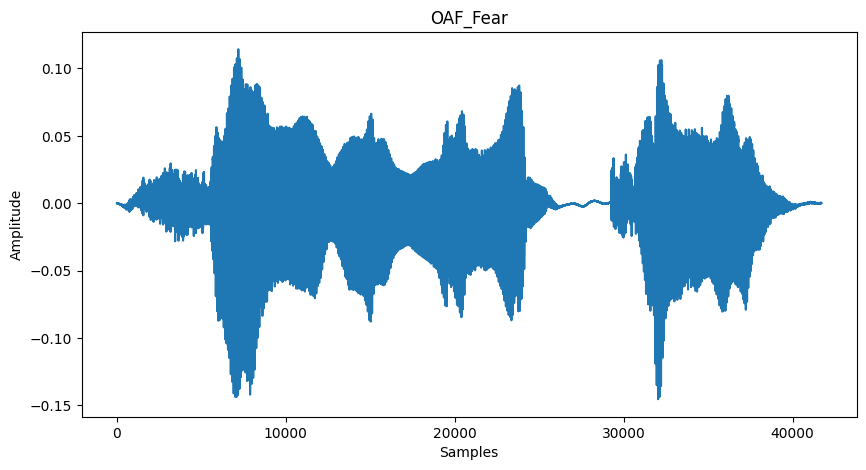

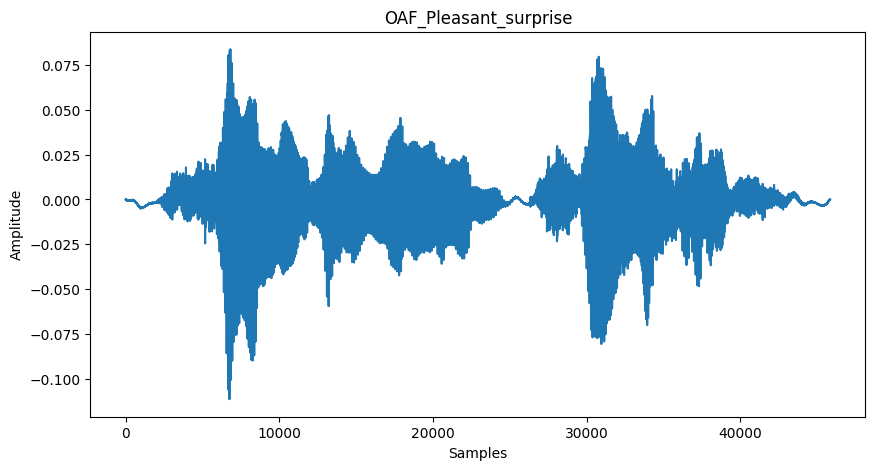

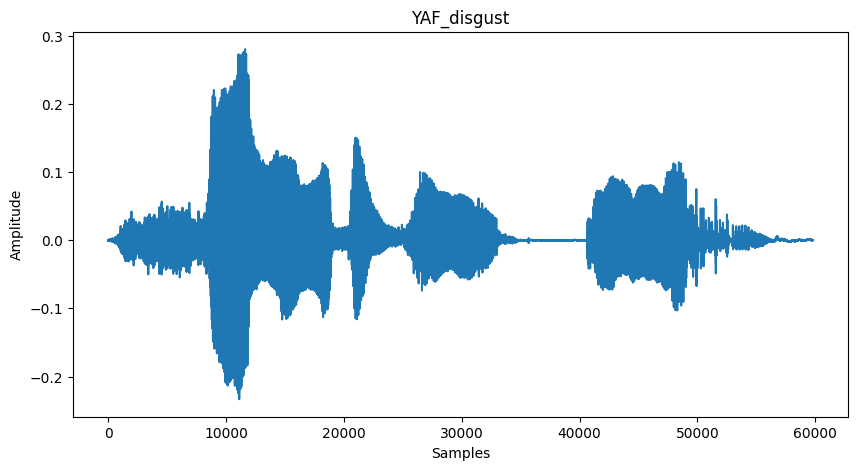

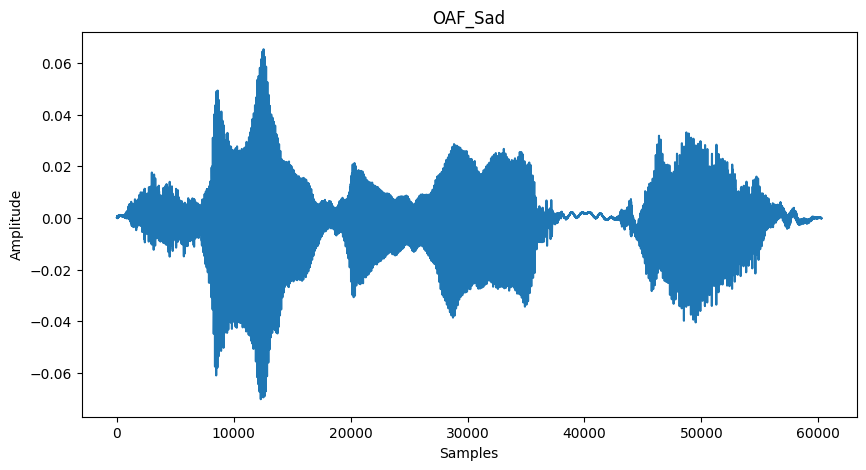

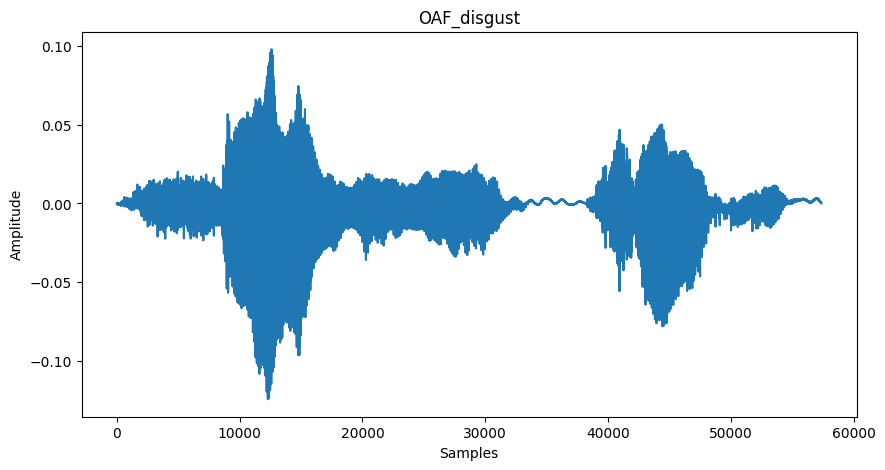

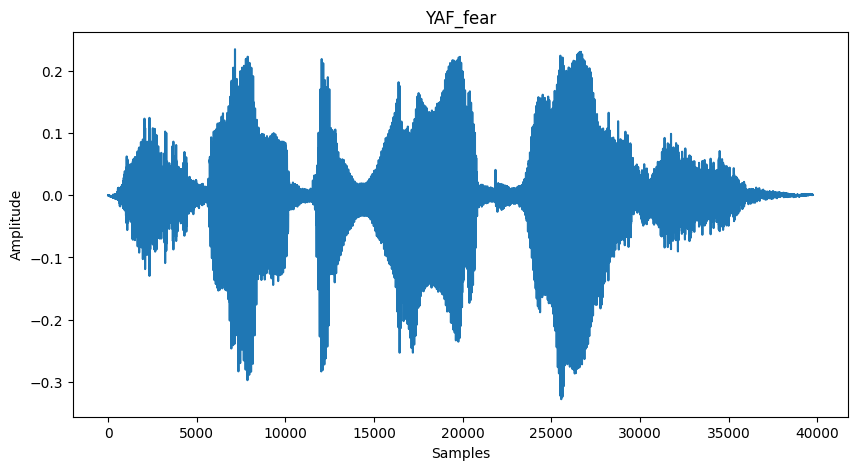

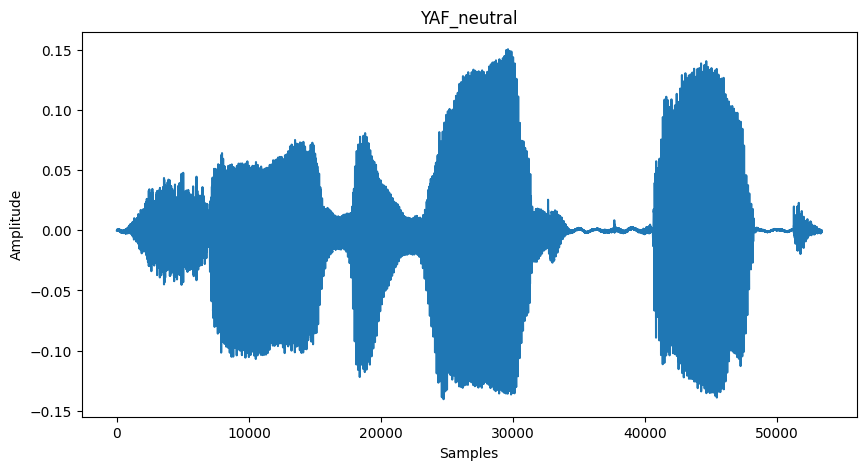

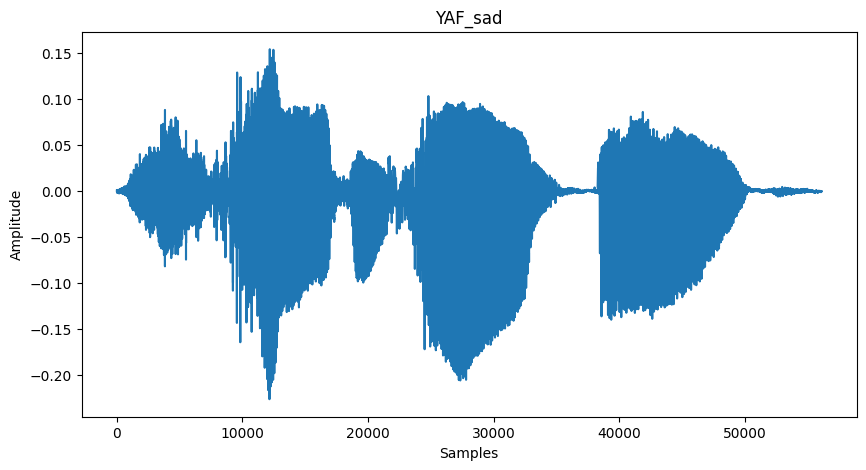

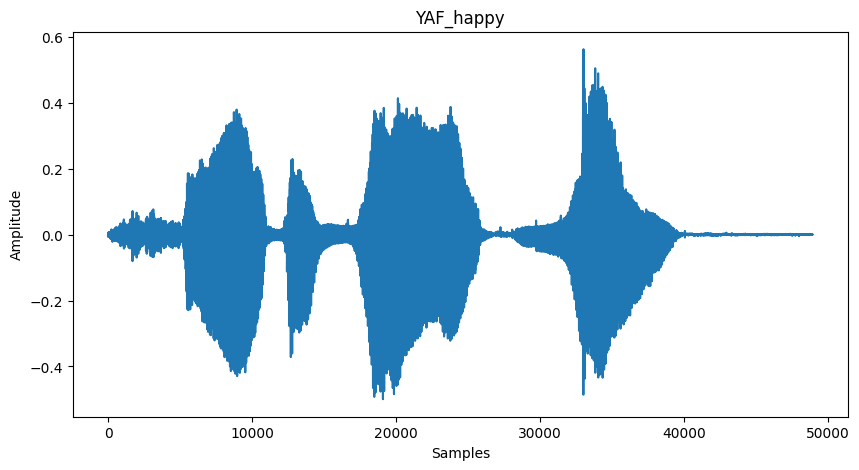

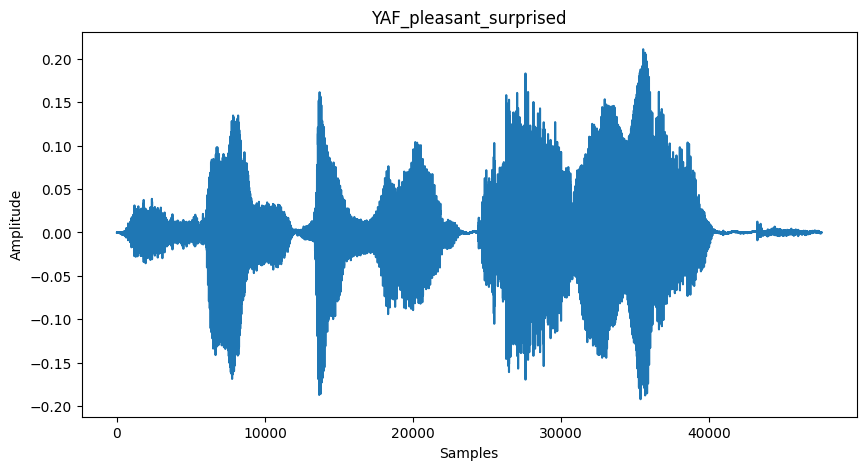

In [37]:
Raw_audio_plot(emotions_fld)

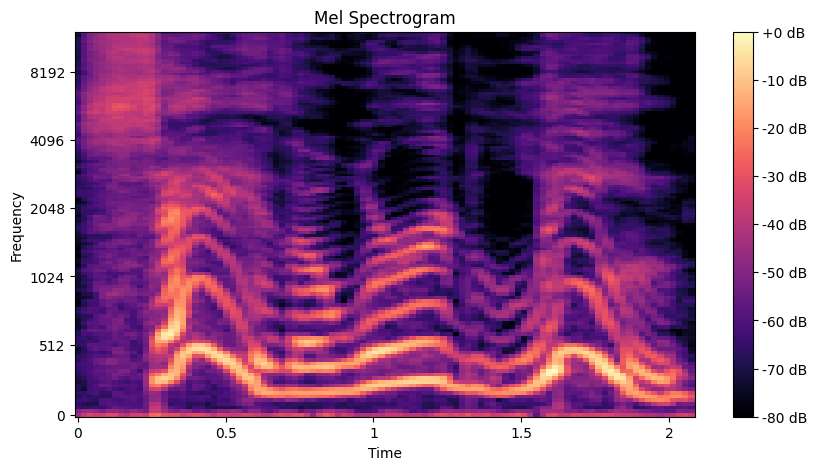

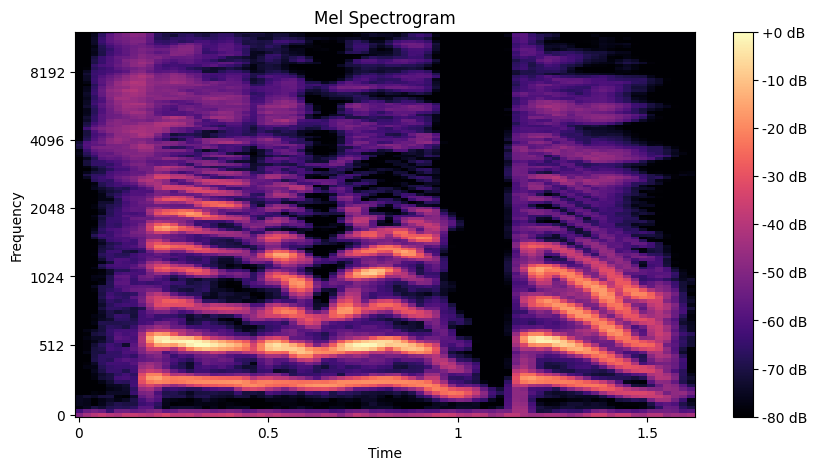

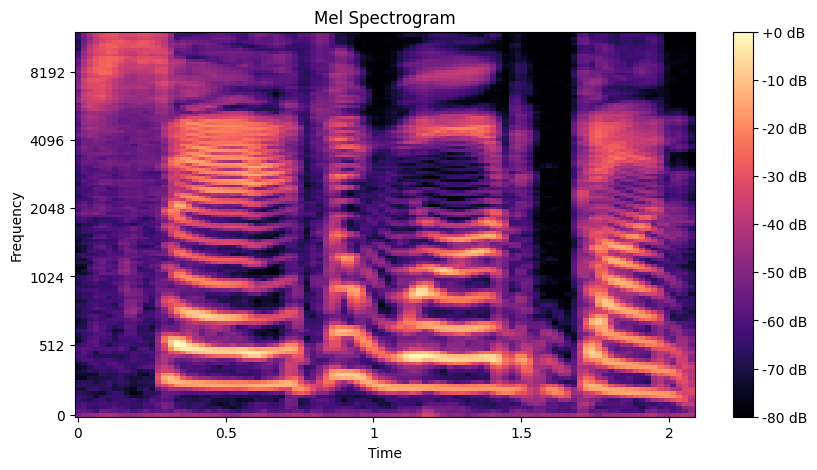

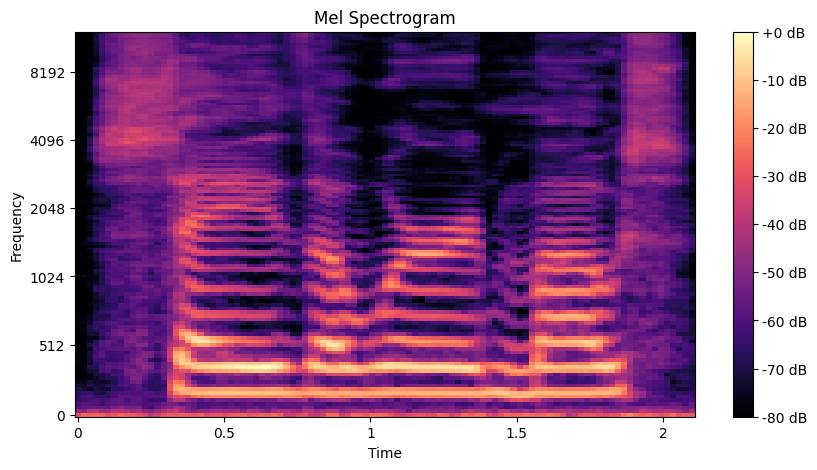

No .wav files found in /content/drive/My Drive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data


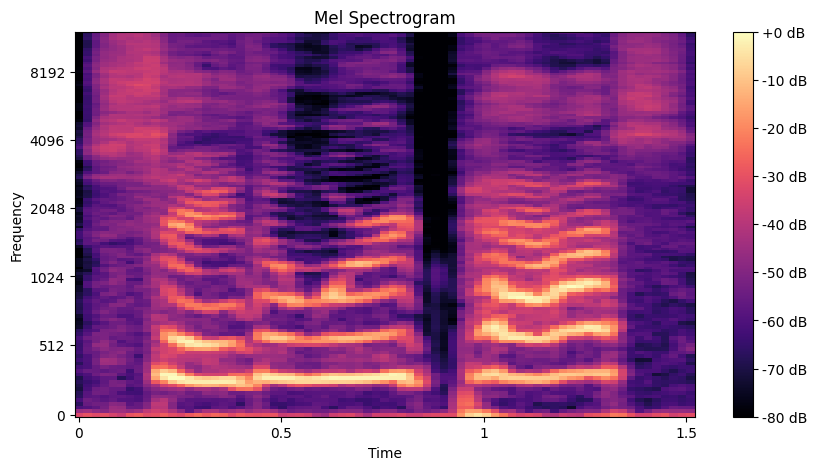

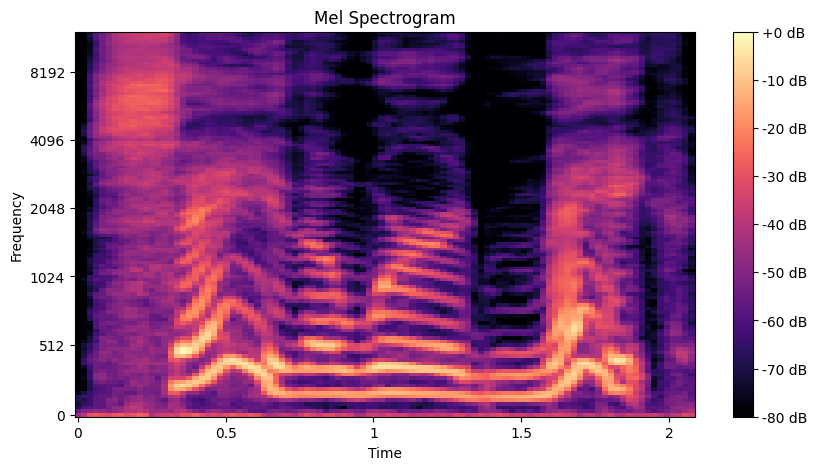

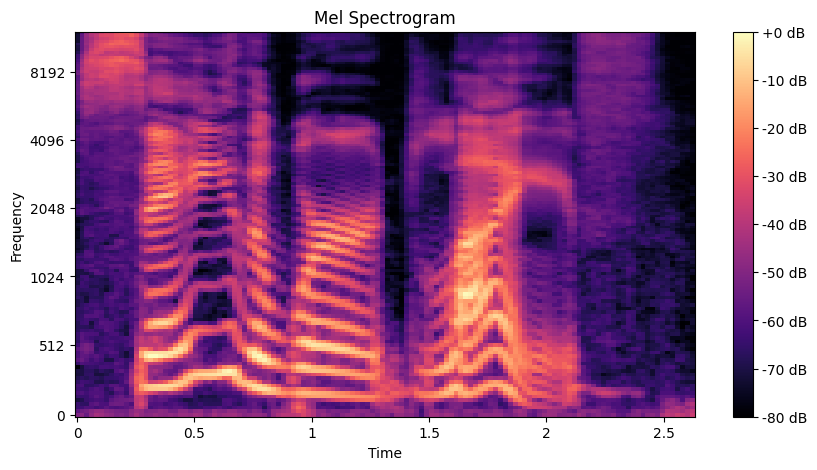

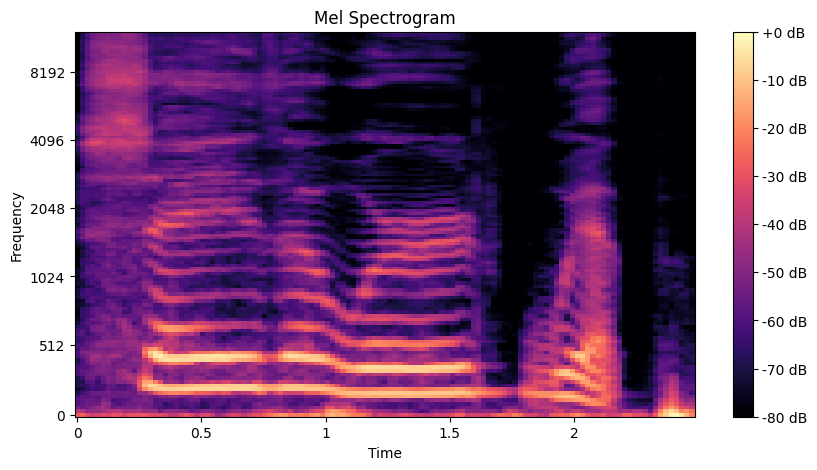

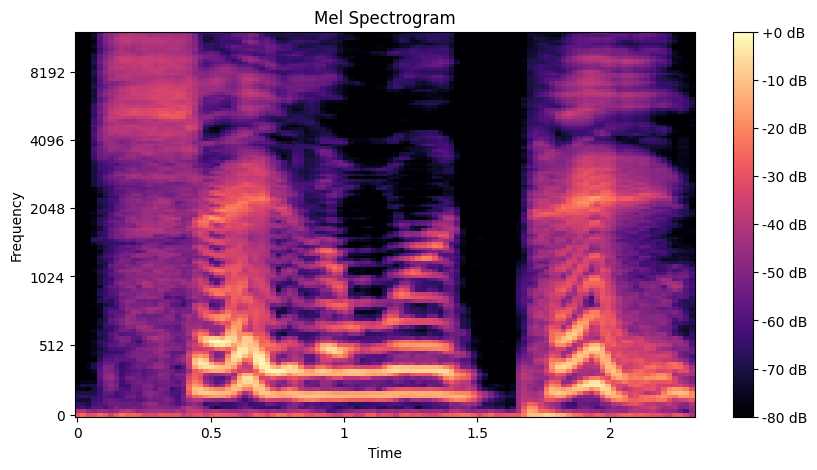

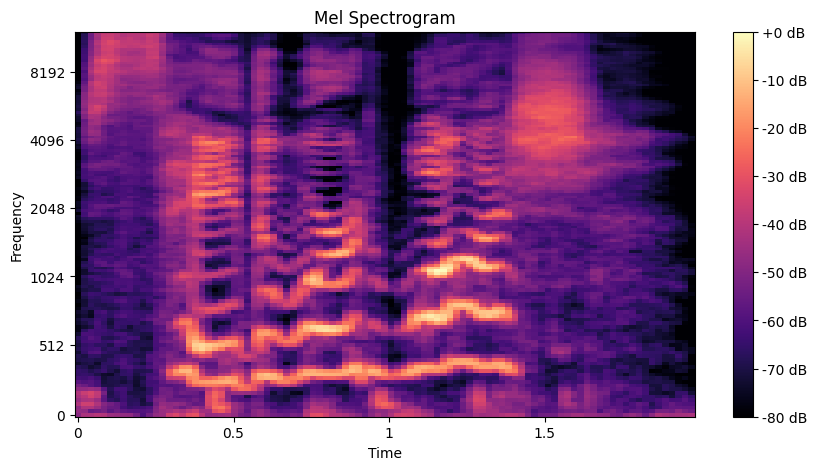

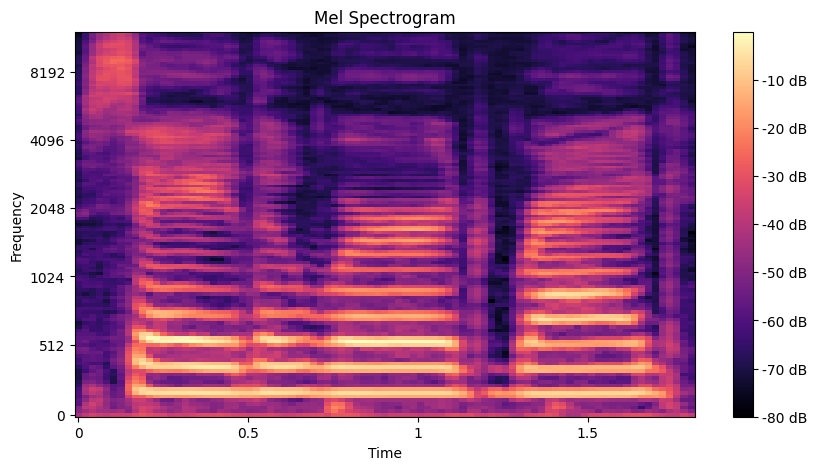

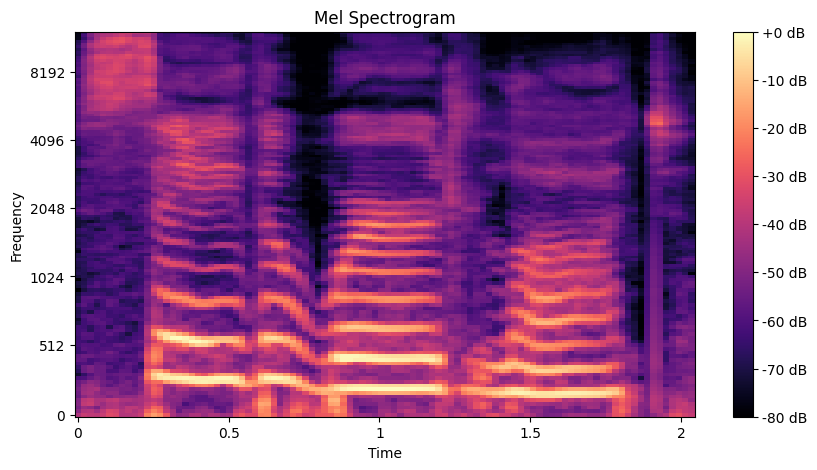

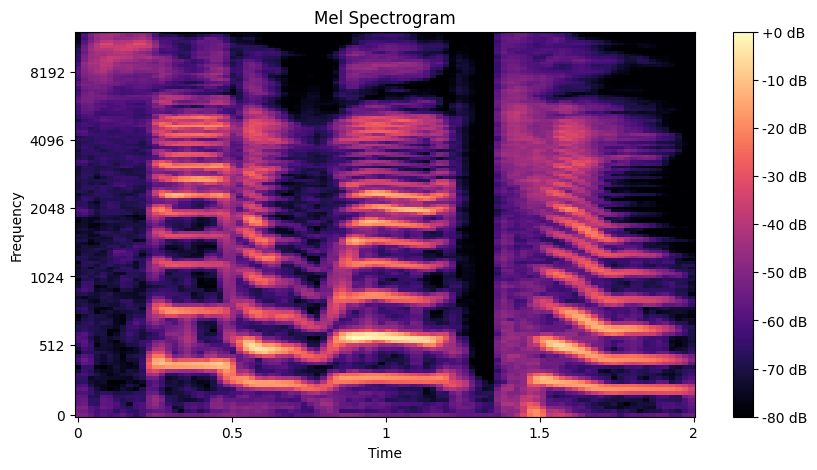

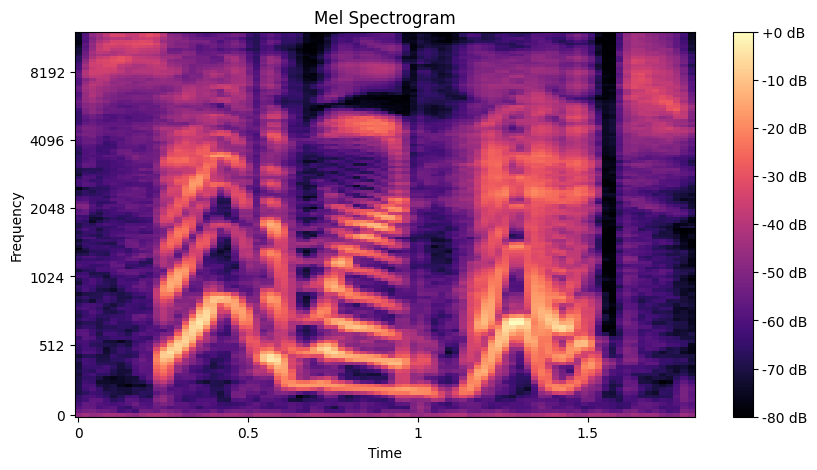

In [38]:
import os
import random
from glob import glob
import matplotlib.pyplot as plt
import librosa.display

def Spectogram_plot(path):
    base_dir = '/content/drive/My Drive/TESS/TESS Toronto emotional speech set data'

    for emotion in path:
        emotion_dir = os.path.join(base_dir, emotion)
        audio_files = glob(os.path.join(emotion_dir, '*.wav'))

        if audio_files:  # Check if audio_files is not empty
            random_audio_file = random.choice(audio_files)
            audio_data, sr = librosa.load(random_audio_file, sr=None)
            plt.figure(figsize=(10, 5))
            spect = librosa.feature.melspectrogram(y=audio_data, sr=sr)
            spect_db = librosa.power_to_db(spect, ref=np.max)
            librosa.display.specshow(spect_db, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Mel Spectrogram')
            plt.xlabel('Time')
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"No .wav files found in {emotion_dir}")



Spectogram_plot(emotions_fld) #plotting

In [39]:
Mfcc=MFCC_feature_extract(emotions_fld)

In [40]:
X= np.vstack(Mfcc['MFCC_Features'].values)
lbl=LabelEncoder()
y=lbl.fit_transform(Mfcc['Class'])
class_labels = lbl.classes_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lbl.fit(y_train)

LabelEncoder()

In [41]:
model=lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 1960, number of used features: 40
[LightGBM] [Info] Start training from score -2.583487
[LightGBM] [Info] Start training from score -2.690351
[LightGBM] [Info] Start training from score -2.646226
[LightGBM] [Info] Start training from score -2.631940
[LightGBM] [Info] Start training from score -2.639057
[LightGBM] [Info] Start training from score -2.576753
[LightGBM] [Info] Start training from score -2.617855
[LightGBM] [Info] Start training from score -2.713165
[LightGBM] [Info] Start training from score -2.705502
[LightGBM] [Info] Start training from score -2.653446
[LightGBM] [Info] Start training from score -2.639057
[LightGBM] [Info] Start training from score -2.653446
[LightGBM] [Info] Start training from score -2.597093
[LightGBM

LGBMClassifier()

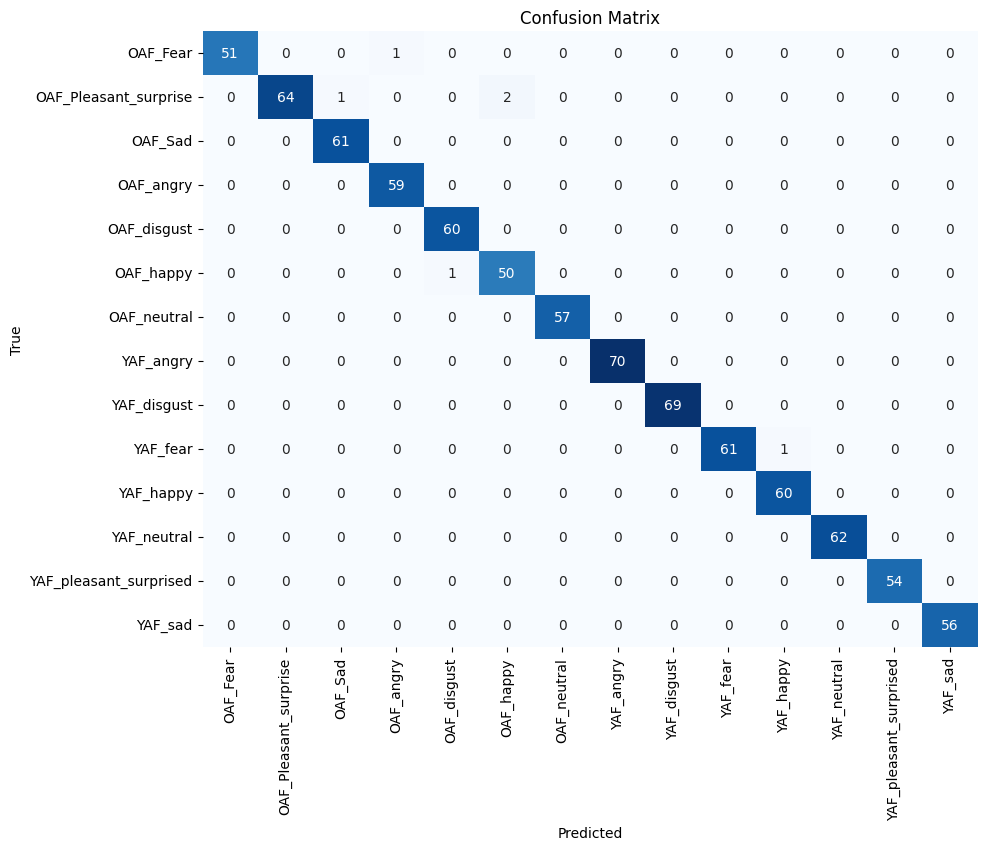

In [43]:
from sklearn.metrics import confusion_matrix

predictions=model.predict(X_test)
# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mtx, index=class_labels, columns=class_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9928571428571429

In [45]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)

# Convert accuracy score to percentage
acc_percentage = acc * 100
print(f"Accuracy in percentage: {acc_percentage:.2f}%")

Accuracy in percentage: 99.29%
